In [1]:
# Source of the Audio File: Sample Audio File Download
# Import the packages needed for this analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [5]:
freq_sample, sig_audio = wavfile.read("/content/Welcome.wav")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [6]:
# Output the parameters: Signal Data Type, Sampling Frequency and Duration
print('\nShape of Signal:', sig_audio.shape)
print('Signal Datatype:', sig_audio.dtype)
print('Signal duration:', round(sig_audio.shape[0] / float(freq_sample), 2), 'seconds')


Shape of Signal: (645632,)
Signal Datatype: int16
Signal duration: 40.35 seconds


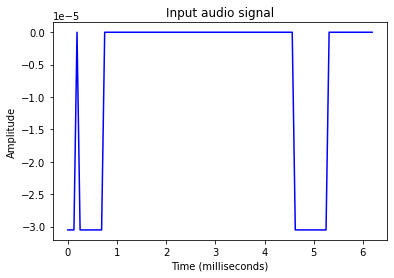

In [7]:
# Normalize the signal values
pow_audio_signal = sig_audio / np.power(2, 15)
# We shall now extract the first 100 values from the signal 
pow_audio_signal = pow_audio_signal [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal), 1) / float(freq_sample)

# Visualize the signal
plt.plot(time_axis, pow_audio_signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

In [8]:
sig_audio = sig_audio / np.power(2, 15)

In [9]:
# Extracting the length and the half-length of the signal to input to the foruier transform
sig_length = len(sig_audio)
half_length = np.ceil((sig_length + 1) / 2.0).astype(np.int)
# We will now be using the Fourier Transform to form the frequency domain of the signal
signal_freq = np.fft.fft(sig_audio)
# Normalize the frequency domain and square it 
signal_freq = abs(signal_freq[0:half_length]) / sig_length
signal_freq **= 2
transform_len = len(signal_freq)

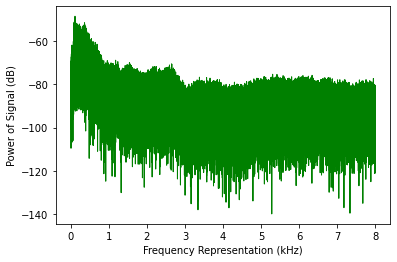

In [10]:
# The Fourier transformed signal now needs to be adjusted for both even and odd cases
if sig_length % 2:
    signal_freq[1:transform_len] *= 2
else:
    signal_freq[1:transform_len-1] *= 2
# Extract the signal's strength in decibels (dB)
exp_signal = 10 * np.log10(signal_freq)
x_axis = np.arange(0, half_length, 1) * (freq_sample / sig_length) / 1000.0
plt.figure()
plt.plot(x_axis, exp_signal, color='green', linewidth=1)
plt.xlabel('Frequency Representation (kHz)')
plt.ylabel('Power of Signal (dB)')
plt.show()

In [11]:
pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp37-none-any.whl size=5888 sha256=7f3d3360efd4d2bb5043a76cd212bcb321cd041711ae2217fec79ae9fdb7fdc0
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [16]:
from python_speech_features import mfcc, logfbank
sampling_freq, sig_audio = wavfile.read("/content/Welcome.wav")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


In [17]:
# We will now be taking the first 15000 samples from the signal for analysis
sig_audio = sig_audio[:15000]
# Using MFCC to extract features from the signal
mfcc_feat = mfcc(sig_audio, sampling_freq)
print('\nMFCC Parameters\nWindow Count =', mfcc_feat.shape[0])
print('Individual Feature Length =', mfcc_feat.shape[1])


MFCC Parameters
Window Count = 93
Individual Feature Length = 13


Text(0.5, 1.05, 'MFCC Features')

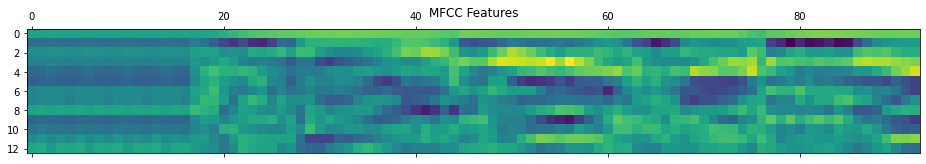

In [18]:
mfcc_feat = mfcc_feat.T
plt.matshow(mfcc_feat)
plt.title('MFCC Features')

In [19]:
# The first horizontal yellow lines below every segment are the fundamental frequency and at its strongest. Above the yellow line are the harmonics that share the same frequency distance between them
# Generating filter bank features
fb_feat = logfbank(sig_audio, sampling_freq)
print('\nFilter bank\nWindow Count =', fb_feat.shape[0])
print('Individual Feature Length =', fb_feat.shape[1])


Filter bank
Window Count = 93
Individual Feature Length = 26


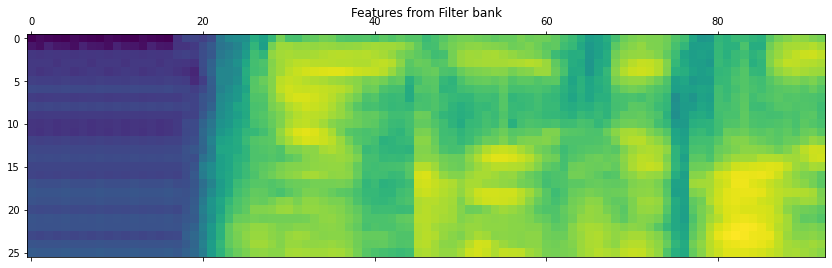

In [20]:
fb_feat = fb_feat.T
plt.matshow(fb_feat)
plt.title('Features from Filter bank')
plt.show()